In [4]:
#colab specific...else ensure content is in dir!
#!unzip inventions.zip
#!unzip /content/wtc-1.zip
#!unzip /content/wtc-2.zip
#!unzip /content/wtc-fugues.zip
!unzip /content/deutschl.zip

Streaming output truncated to the last 5000 lines.
  inflating: essen/europa/deutschl/altdeu2/deut4317.krn  
  inflating: essen/europa/deutschl/zuccal/deut4649.krn  
  inflating: essen/europa/deutschl/altdeu2/deut4367.krn  
  inflating: essen/europa/deutschl/zuccal/deut4623.krn  
  inflating: essen/europa/deutschl/altdeu2/deut4316.krn  
  inflating: essen/europa/deutschl/zuccal/deut4907.krn  
  inflating: essen/europa/deutschl/altdeu2/deut4121.krn  
  inflating: essen/europa/deutschl/zuccal/deut4836.krn  
  inflating: essen/europa/deutschl/altdeu2/deut4150.krn  
  inflating: essen/europa/deutschl/zuccal/deut4698.krn  
  inflating: essen/europa/deutschl/altdeu2/deut4271.krn  
  inflating: essen/europa/deutschl/zuccal/deut5003.krn  
  inflating: essen/europa/deutschl/altdeu2/deut4170.krn  
  inflating: essen/europa/deutschl/zuccal/deut4748.krn  
  inflating: essen/europa/deutschl/altdeu2/deut4258.krn  
  inflating: essen/europa/deutschl/zuccal/deut4963.krn  
  inflating: essen/europa/deu

In [5]:
!pip install music21
!pip install --upgrade music21
!add-apt-repository ppa:mscore-ubuntu/mscore-stable -y
!apt-get update
!apt-get install musescore
!apt-get install xvfb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.4 MB 5.0 MB/s 
  Attempting uninstall: music21
    Found existing installation: music21 5.5.0
    Uninstalling music21-5.5.0:
      Successfully uninstalled music21-5.5.0


Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2,990 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:13 htt

In [2]:
!pip install pygame

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import os
from typing import Optional
import music21 as m21
from music21 import *
import pygame 

us = environment.UserSettings()
us['musescoreDirectPNGPath'] = '/usr/bin/mscore'
us['directoryScratch'] = '/tmp'

pygame 2.1.2 (SDL 2.0.16, Python 3.7.14)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [13]:
#user must fetch these two params prior to instantiation
KERN_DATASET_PATH = "/content/essen/europa/deutschl/test"
SAVE_DIR = "/content/dataset"

class ScoreLibrarian:

  '''inspired by the role of Church Music Librarian in a music ministry. Handles keeping of 
     scores, score retrieval, making copies, and the PREPROCESSING actions that are required
     for the child class to interperet(the model). in this case, the scorelibrarian is the 
     preprocessor, and the "singer" or "musician" is the model that learns the music. The musician
     recieves the score "ready 2 go" without the need of preprocessing actions so that they can 
     focus soley on learning the music'''

  '''you must specify the dataset_path, the save dir path, and if you pass auto_encode in fetch
     then will write a file in dir of a list that is encoded song'''

  def __init__(self, dataset_path:str, save_dir:str):
    '''score librarian will load the data from selected dirs and "fetch" scores'''
    self._acceptable_durations = [0.25, 0.5, 0.75, 1, 1.5, 2, 3, 4]
    self.dataset_path = dataset_path
    self.save_dir = save_dir 
    #create save dir upon instantiation!
    if not os.path.exists(self.save_dir):
      os.mkdir(save_dir)
    print("Loading Songs...\n")
    self.songs = self.__getitem__()
    print(f"\033[93mLoaded {len(self.songs)} songs from directory!\033[0m\n")
    
    
  def __getitem__(self):
    '''returns all songs from dir'''
    return self._load_songs_in_kern(self.dataset_path, "krn")
    

  def _load_songs_in_kern(self, dataset_path:str, file_type:str, songs=[]):
    for path, subdir, files in os.walk(dataset_path):
      for f in files:
        if f[-3:] == file_type and f not in songs:
          song = m21.converter.parse(os.path.join(path, f))
          songs.append(song)
      return songs 


  def _has_acceptable_duration(self, song):
    for note in song.flat.notesAndRests:
      if note.duration.quarterLength not in self._acceptable_durations:
        return False 
    return True 


  def _transpose(self, song):
    '''transposes song to Cmaj/Amin'''
    #get key from song
    parts = song.getElementsByClass(m21.stream.Part)
    measures_part0 = parts[0].getElementsByClass(m21.stream.Measure)
    key_sig = measures_part0[0][4]
    #estimate key using music21(if no key provided)
    if not isinstance(key, m21.key.Key):
      key_sig = song.analyze("key")
    print(f"\nOriginal key signature: {key_sig}\n")
    #get interval for transposition
    if key_sig.mode == "major":
      interval = m21.interval.Interval(key_sig.tonic, m21.pitch.Pitch("C"))
    elif key_sig.mode == "minor":
      interval = m21.interval.Interval(key_sig.tonic, m21.pitch.Pitch("A"))
    #transpose on that interval(which is an object)
    return song.transpose(interval)


  def fetch_score(self, song_index:int, 
                  show_song:Optional[bool]=False, 
                  halt_transpostion:Optional[bool]=False,
                  deliver_encoded:Optional[bool]=False):
    '''will fetch a single song based on the index_place that you specify and return
       the transposed(concert pitch) version of the score. Halt_transpostion returns non trans
       song'''
    raw_song = self.songs[song_index]
    print(f"Song #{song_index} fetched from my library!")
    print(f"has acceptable durations: {self._has_acceptable_duration(raw_song)}")
    transposed_song = self._transpose(raw_song)

    def halt_or_not(show_song:bool, halt_transpostion:bool):
      if show_song and not halt_transpostion:
        transposed_song.show()
        transposed_song.show('midi')
      if show_song and halt_transpostion:
        raw_song.show()
        raw_song.show('midi')
      return raw_song if halt_transpostion else transposed_song

    def encode_or_not(encode, fetched_song):
      return self.encode_song(fetched_song) if encode \
             else fetched_song

    fetched_song0 = halt_or_not(show_song, halt_transpostion)
    return encode_or_not(deliver_encoded, fetched_song0)
    


  def encode_song(self, song, time_step=0.25, encoded_song=[]):
    '''convert song to time series representation.time_step is a 16th note'''
    #p=60, d=1.0 -> [60, "_", "_", "_"]
    for event in song.flat.notesAndRests:
      #handle notes 
      if isinstance(event, m21.note.Note):
        symbol = event.pitch.midi
      #handle rests
      elif isinstance(event, m21.note.Rest):
        symbol = "r"
      #convert the note/rest into time series notation
      steps = int(event.duration.quarterLength / time_step)
      for step in range(steps):
        if step == 0:
          encoded_song.append(symbol)
        else:
          encoded_song.append("_")

    #cast encoded song to a str...map is like casting a type!!!
    encoded_song = " ".join(map(str, encoded_song))
    return encoded_song


  def prepare_encoded_library(self):
    '''recursively prepares all scores in dir that is specified upon 
       instantiantion aka dataset_path'''
    for i, song in enumerate(self.songs):
      song = self._transpose(song)
      encoded_song = self.encode_song(song)
      #str that will exist with the instantiation of the class is save dir
      save_path = os.path.join(self.save_dir, str(i))
      if not os.path.exists(save_path):
        with open(save_path, "w") as fp:
          fp.write(encoded_song)




  


######################END_ScoreLibrarian_CLASS#################################


In [14]:
librarian = ScoreLibrarian(KERN_DATASET_PATH, SAVE_DIR)

Loading Songs...

Loaded 12 songs from directory!



In [24]:
'''recursively encode and write all encodings to dedicated dir'''
librarian.prepare_encoded_library()


Original key signature: e minor


Original key signature: F major


Original key signature: F major


Original key signature: a minor


Original key signature: g minor


Original key signature: e minor


Original key signature: F major


Original key signature: a minor


Original key signature: a minor


Original key signature: D major


Original key signature: e minor


Original key signature: e minor



Song #0 fetched from my library!
has acceptable durations: True

Original key signature: e minor



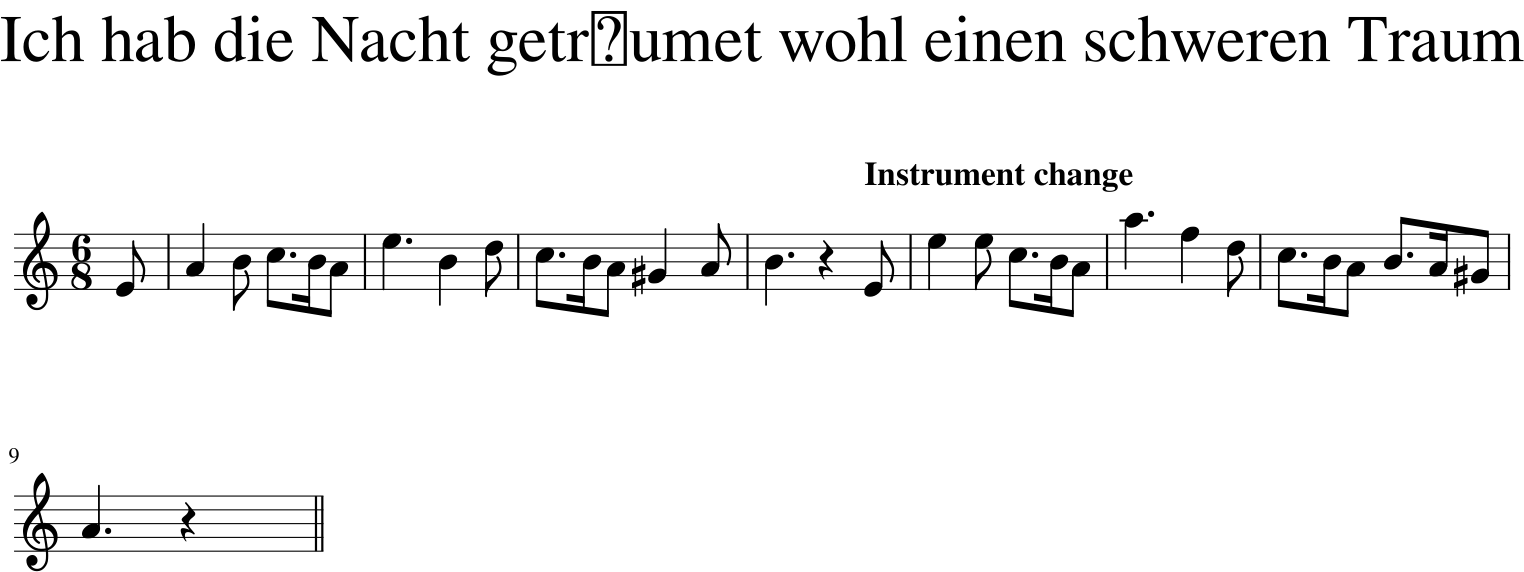

'64 _ 69 _ _ _ 71 _ 72 _ _ 71 69 _ 76 _ _ _ _ _ 71 _ _ _ 74 _ 72 _ _ 71 69 _ 68 _ _ _ 69 _ 71 _ _ _ _ _ r _ _ _ 64 _ 76 _ _ _ 76 _ 72 _ _ 71 69 _ 81 _ _ _ _ _ 77 _ _ _ 74 _ 72 _ _ 71 69 _ 71 _ _ 69 68 _ 69 _ _ _ _ _ r _ _ _ 55 _ _ _ 64 _ _ _ 64 _ 64 _ 64 _ _ _ 62 _ 62 _ 62 _ _ _ _ _ 60 _ 60 _ _ _ 55 _ _ _ 65 _ _ _ 65 _ 65 _ 65 _ 64 _ 67 _ 64 _ 64 _ _ _ 62 _ _ _ r _ _ _ 55 _ _ _ 67 _ _ _ 67 _ 67 _ 67 _ _ _ 65 _ 65 _ 64 _ _ _ _ _ _ _ 67 _ 65 _ 64 _ 62 _ 60 _ _ _ 60 _ 60 _ 64 _ 62 _ 62 _ _ _ 60 _ _ _ _ _ _ _ 62 _ _ _ 65 _ _ _ 64 _ _ _ 64 _ 64 _ 67 _ 65 _ 64 _ 62 _ 60 _ _ _ _ _ _ _ r _ _ _ 55 _ _ _ 64 _ _ _ 64 _ 64 _ 64 _ _ _ 62 _ 62 _ 62 _ _ _ _ _ 60 _ 60 _ _ _ 55 _ _ _ 65 _ _ _ 65 _ 65 _ 65 _ 64 _ 67 _ 64 _ 64 _ _ _ 62 _ _ _ r _ _ _ 55 _ _ _ 67 _ _ _ 67 _ 67 _ 67 _ _ _ 65 _ 65 _ 64 _ _ _ _ _ _ _ 67 _ 65 _ 64 _ 62 _ 60 _ _ _ 60 _ 60 _ 64 _ 62 _ 62 _ _ _ 60 _ _ _ _ _ _ _ 62 _ _ _ 65 _ _ _ 64 _ _ _ 64 _ 64 _ 67 _ 65 _ 64 _ 62 _ 60 _ _ _ _ _ _ _ r _ _ _ 76 _ _ _ _ _ 74 _ 72 _ 64 _ 69 _ _ _ 6

In [22]:
transposed_encoded_song = librarian.fetch_score(song_index=0, 
                                                show_song=True, 
                                                deliver_encoded=True)

transposed_encoded_song

Song #0 fetched from my library!
has acceptable durations: True

Original key signature: e minor



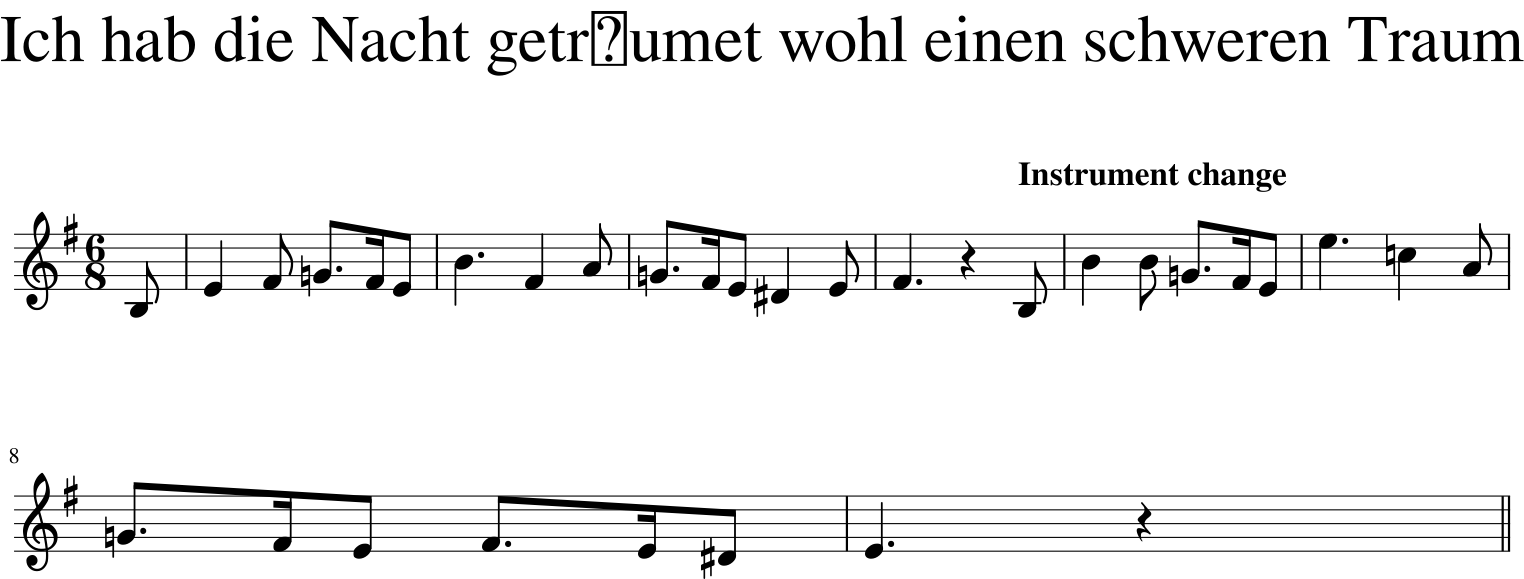

'64 _ 69 _ _ _ 71 _ 72 _ _ 71 69 _ 76 _ _ _ _ _ 71 _ _ _ 74 _ 72 _ _ 71 69 _ 68 _ _ _ 69 _ 71 _ _ _ _ _ r _ _ _ 64 _ 76 _ _ _ 76 _ 72 _ _ 71 69 _ 81 _ _ _ _ _ 77 _ _ _ 74 _ 72 _ _ 71 69 _ 71 _ _ 69 68 _ 69 _ _ _ _ _ r _ _ _ 55 _ _ _ 64 _ _ _ 64 _ 64 _ 64 _ _ _ 62 _ 62 _ 62 _ _ _ _ _ 60 _ 60 _ _ _ 55 _ _ _ 65 _ _ _ 65 _ 65 _ 65 _ 64 _ 67 _ 64 _ 64 _ _ _ 62 _ _ _ r _ _ _ 55 _ _ _ 67 _ _ _ 67 _ 67 _ 67 _ _ _ 65 _ 65 _ 64 _ _ _ _ _ _ _ 67 _ 65 _ 64 _ 62 _ 60 _ _ _ 60 _ 60 _ 64 _ 62 _ 62 _ _ _ 60 _ _ _ _ _ _ _ 62 _ _ _ 65 _ _ _ 64 _ _ _ 64 _ 64 _ 67 _ 65 _ 64 _ 62 _ 60 _ _ _ _ _ _ _ r _ _ _ 55 _ _ _ 64 _ _ _ 64 _ 64 _ 64 _ _ _ 62 _ 62 _ 62 _ _ _ _ _ 60 _ 60 _ _ _ 55 _ _ _ 65 _ _ _ 65 _ 65 _ 65 _ 64 _ 67 _ 64 _ 64 _ _ _ 62 _ _ _ r _ _ _ 55 _ _ _ 67 _ _ _ 67 _ 67 _ 67 _ _ _ 65 _ 65 _ 64 _ _ _ _ _ _ _ 67 _ 65 _ 64 _ 62 _ 60 _ _ _ 60 _ 60 _ 64 _ 62 _ 62 _ _ _ 60 _ _ _ _ _ _ _ 62 _ _ _ 65 _ _ _ 64 _ _ _ 64 _ 64 _ 67 _ 65 _ 64 _ 62 _ 60 _ _ _ _ _ _ _ r _ _ _ 76 _ _ _ _ _ 74 _ 72 _ 64 _ 69 _ _ _ 6

In [23]:
untransposed_encoded_song = librarian.fetch_score(song_index=0, 
                                                  show_song=True, 
                                                  halt_transpostion=True,
                                                  deliver_encoded=True)

untransposed_encoded_song

In [ ]:
'''main job execution block'''

def execute():
  librarian = ScoreLibrarian()
  print(f"All songs in my library: \n{librarian.songs}")
  song1 = librarian.fetch_song(0)
  print("\n")
  print(song1)


if __name__ == "__main__":
  execute()



Loading Songs...

Loaded 24 songs from directory!

All songs in my library: 
[<music21.stream.Score 0x7fb66b946850>, <music21.stream.Score 0x7fb66b94b090>, <music21.stream.Score 0x7fb66b4ae5d0>, <music21.stream.Score 0x7fb66a707bd0>, <music21.stream.Score 0x7fb66a716d50>, <music21.stream.Score 0x7fb66a291ed0>, <music21.stream.Score 0x7fb669e03690>, <music21.stream.Score 0x7fb669e03f10>, <music21.stream.Score 0x7fb6697f7090>, <music21.stream.Score 0x7fb66996a250>, <music21.stream.Score 0x7fb669307750>, <music21.stream.Score 0x7fb66927fb50>, <music21.stream.Score 0x7fb669b80b50>, <music21.stream.Score 0x7fb668ec61d0>, <music21.stream.Score 0x7fb668e7c9d0>, <music21.stream.Score 0x7fb668615ad0>, <music21.stream.Score 0x7fb6680779d0>, <music21.stream.Score 0x7fb667f4da90>, <music21.stream.Score 0x7fb6673b1cd0>, <music21.stream.Score 0x7fb6675069d0>, <music21.stream.Score 0x7fb666f96f90>, <music21.stream.Score 0x7fb667494c90>, <music21.stream.Score 0x7fb6671ac3d0>, <music21.stream.Score 0x7

In [ ]:
#load the songs
#filter out the songs with non-acceptable durations
#transpose songs to cmaj/amin
#encode songs with music time series rep
#save songs to text file 